# Housing prices - DecisionTreeRegressor

* Kaggle competition (https://www.kaggle.com/c/home-data-for-ml-course)
* Kaggle tutorial (https://www.kaggle.com/learn/intro-to-machine-learning)

## Model 7: nodes70              - MAE: 26763.34 *

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

### Data

In [2]:
# Data import
train_data_path = '../datasets/ames_housing/train.csv'
test_data_path = '../datasets/ames_housing/test.csv'

train_data = pd.read_csv(train_data_path, index_col='Id')
test_data = pd.read_csv(test_data_path, index_col='Id')

train_data.head()

MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
Id                                                                    
1           60       RL         65.0     8450   Pave   NaN      Reg   
2           20       RL         80.0     9600   Pave   NaN      Reg   
3           60       RL         68.0    11250   Pave   NaN      IR1   
4           70       RL         60.0     9550   Pave   NaN      IR1   
5           60       RL         84.0    14260   Pave   NaN      IR1   

   LandContour Utilities LotConfig  ... PoolArea PoolQC Fence MiscFeature  \
Id                                  ...                                     
1          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
2          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   
3          Lvl    AllPub    Inside  ...        0    NaN   NaN         NaN   
4          Lvl    AllPub    Corner  ...        0    NaN   NaN         NaN   
5          Lvl    AllPub       FR2  ...        0    NaN   NaN         NaN   

   MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
Id                                                             
1        0      2    2008        WD         Normal     208500  
2        0      5    2007        WD         Normal     181500  
3        0      9    2008        WD         Normal     223500  
4        0      2    2006        WD        Abnorml     140000  
5        0     12    2008        WD         Normal     250000  

[5 rows x 80 columns]

### EDA

In [3]:
train_data.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1460.000000  1201.000000    1460.000000  1460.000000  1460.000000   
mean     56.897260    70.049958   10516.828082     6.099315     5.575342   
std      42.300571    24.284752    9981.264932     1.382997     1.112799   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    59.000000    7553.500000     5.000000     5.000000   
50%      50.000000    69.000000    9478.500000     6.000000     5.000000   
75%      70.000000    80.000000   11601.500000     7.000000     6.000000   
max     190.000000   313.000000  215245.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1460.000000   1460.000000  1452.000000  1460.000000  1460.000000  ...   
mean   1971.267808   1984.865753   103.685262   443.639726    46.549315  ...   
std      30.202904     20.645407   181.066207   456.098091   161.319273  ...   
min    1872.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1967.000000     0.000000     0.000000     0.000000  ...   
50%    1973.000000   1994.000000     0.000000   383.500000     0.000000  ...   
75%    2000.000000   2004.000000   166.000000   712.250000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

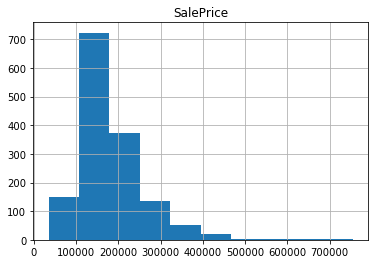

In [4]:
train_data[['SalePrice']].hist();

### Train / Test

In [5]:
cols = ['LotArea', 'YearBuilt', '1stFlrSF', '2ndFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = train_data[cols]
y = train_data.SalePrice

X_test = test_data[cols]

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state=1)

### Model

In [6]:
models = [
    {'id':0, 'name':'base', 
         'model':DecisionTreeRegressor(random_state=1)},
    {'id':1, 'name':'nodes10', 
         'model':DecisionTreeRegressor(random_state=1, max_leaf_nodes=10)},
    {'id':2, 'name':'nodes20', 
         'model':DecisionTreeRegressor(random_state=1, max_leaf_nodes=20)},
    {'id':3, 'name':'nodes30', 
         'model':DecisionTreeRegressor(random_state=1, max_leaf_nodes=30)},
    {'id':4, 'name':'nodes40', 
         'model':DecisionTreeRegressor(random_state=1, max_leaf_nodes=40)},
    {'id':5, 'name':'nodes50', 
         'model':DecisionTreeRegressor(random_state=1, max_leaf_nodes=50)},
    {'id':6, 'name':'nodes60', 
         'model':DecisionTreeRegressor(random_state=1, max_leaf_nodes=60)},
    {'id':7, 'name':'nodes70', 
         'model':DecisionTreeRegressor(random_state=1, max_leaf_nodes=70)},
    {'id':8, 'name':'nodes100', 
         'model':DecisionTreeRegressor(random_state=1, max_leaf_nodes=100)}
    
]

# Function for comparing different models
def score_model(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

def get_best_model(models):
    best_mae = -1
    best_model = None
    best_id = -1

    for i in models:
        mae = score_model(i['model'])
        if best_mae == -1 or mae < best_mae:
            best_id = i['id']
            best_mae = mae
            best_model = i['model']
            

        print("- Model {}: {:20} - MAE: {:.2f} {}".format(i['id'], i['name'], mae, ('*' if best_mae == mae else '')))

    return best_id, best_mae, best_model

# Get best model
best_id, best_mae, best_model = get_best_model(models)

- Model 0: base                 - MAE: 29652.93 *
- Model 1: nodes10              - MAE: 31585.43 
- Model 2: nodes20              - MAE: 28707.31 *
- Model 3: nodes30              - MAE: 28877.04 
- Model 4: nodes40              - MAE: 28106.18 *
- Model 5: nodes50              - MAE: 27405.93 *
- Model 6: nodes60              - MAE: 27110.90 *
- Model 7: nodes70              - MAE: 26763.34 *
- Model 8: nodes100             - MAE: 27282.51 


### Submit predictions

In [7]:
# Fit the model to the training data
best_model.fit(X, y)

# Generate test predictions
preds = best_model.predict(X_test)

# Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds})
output.to_csv('submission_{}_{:03}.csv'.format(type(best_model).__name__, best_id), index=False)